# Homework 6

Using a dataset - for example from https://archive.ics.uci.edu/ml/datasets.php?format=&task=&att=&area=&numAtt=&numIns=&type=text&sort=taskDown&view=table - solve a classification or regression problem starting from text inputs.

You may choose BOW, n-grams, word2vec or other appropriate coding. Prediction models can be from the scikit-learn library. You can use the [NLTK](https://www.nltk.org) library for preprocessing.

For classification the F1 score will be optimized; F1 scores and accuracy will be reported. For regression optimize the mean squared error score; report the MSE, mean absolute error, r2 scores.

Examples:
1. [SMS Spam Collection](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)
1. [Sentence Classification Data Set](https://archive.ics.uci.edu/ml/datasets/Sentence+Classification#)
1. [Sentiment Labelled Sentences Data Set](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)
1. [Victorian Era Authorship Attribution Data Set](https://archive.ics.uci.edu/ml/datasets/Victorian+Era+Authorship+Attribution)
1. [Amazon Commerce reviews set Data Set](https://archive.ics.uci.edu/ml/datasets/Amazon+Commerce+reviews+set)
1. [Farm Ads Data Set](https://archive.ics.uci.edu/ml/datasets/Farm+Ads)


A minimum of 2 data sets will be investigated and for each of them a minimum of 4 classification or regression models. If the data set is already split into train and test, it will be used as such - the training set will be additionally split into train + validation; otherwise, 5 fold CV. The optimal hyperparameter values will be chosen by random search or grid search.

For each data set:
1. (2 x 0.5 p) Describe the dataset, in Romanian (content, origin, problem, etc.).
1. (2 x 1 p) Do exploratory analysis, using Python code: distribution of classes or continuous output values - numerically and graphically, statistics on texts (e.g. minimum/average/maximum length; most frequent k words; clustering etc.). Each step will be explained and what is meant by doing it. The graphs will have named axes (what they represent, possibly units of measurement)
1. (2 x 0.5 p) Pre-process the data; explain in Romanian which pre-processing methods are used, their effect on the input data, what form the output takes; show the effects of the pre-processing steps on the data set (new number of documents, vocabulary dynamics, resulting features etc.) Graphs and tables can be added to this step.
1. (2 x 4 x 0.5 p) Classification or regression, as appropriate: a description of the models considered is given, in Romanian; the way of searching for hyperparameters is described; the results obtained will be presented in tabular form, similar to the previous topic. 

Two points are awarded by default.

The description of the models and the preprocessing steps may be in separate sections, with references to them where necessary.

Examples:
1. [Working With Text Data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
1. [Text Classification with Python and Scikit-Learn](https://stackabuse.com/text-classification-with-python-and-scikit-learn/)
1. [How to Prepare Text Data for Machine Learning with scikit-learn](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)

In [4]:
import re
import nltk
import scipy
import pandas
import sklearn
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from typing import List, Dict, Union
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
nltk.download('wordnet')
nltk.download('stopwords')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bogdi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bogdi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Amazon Fine Foods Reviews
##### Source:
J. McAuley and J. Leskovec. From Amateurs to Connoisseurs: Shaping User Skills Development through Online Reviews. WWW, 2013.

##### Information record:
This dataset consists of reviews of delicatessen products on Amazon. Data spans more than 10 years, including all ~500,000 reviews through October 2012. Reviews include product and user information, ratings, and a text-only review. We also have reviews from all other Amazon categories.

##### Information about the attributes:
Number of reviews: 568,454 <br>
Number of users: 256,059 <br>
Number of products: 74,258 <br>
Users with > 50 reviews: 260 <br>
Average number of words per review: 56 <br>
Duration of the period: October 1999 - October 2012 <br>

### Corona Tweets Dataset
##### Source:
Unknown

##### Data set information:
This dataset has the tweets extracted from Twitter, and their labeling was done manually.
Names and usernames have been given codes to avoid any privacy issues.

##### Information about attributes:
Columns:
1) Location <br>
2) Tweet At <br>
3) Original Tweet <br>
4) Label <br>

In [5]:
df:object = pd.read_csv('./data/Reviews.csv', index_col=0)
df = df.dropna()
print(f'The dataframe shape is: {df.shape}')
df.head(5)

The dataframe shape is: (568401, 9)


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.drop_duplicates(subset={'UserId', 'ProfileName', 'Time', 'Text'}, inplace=True)
print(f'The dataframe shape after removing the duplicate rows is: {df.shape}')

The dataframe shape after removing the duplicate rows is: (393914, 9)


Graph that shows which customer reviews are the majority. <br>
One can see the predominance of those with the highest score (approx. 250000).< b>r
We can divide the reviews into categories according to their score as follows: <br>
Score > 3 -> positive review <br>
Score = 3 -> neutral review <br>
Score < 3 -> negative review <br>
Again, the predominance of the positive ones is observed (approx. 310000), however, the negative ones are not a negligible amount either (approx. 70000)

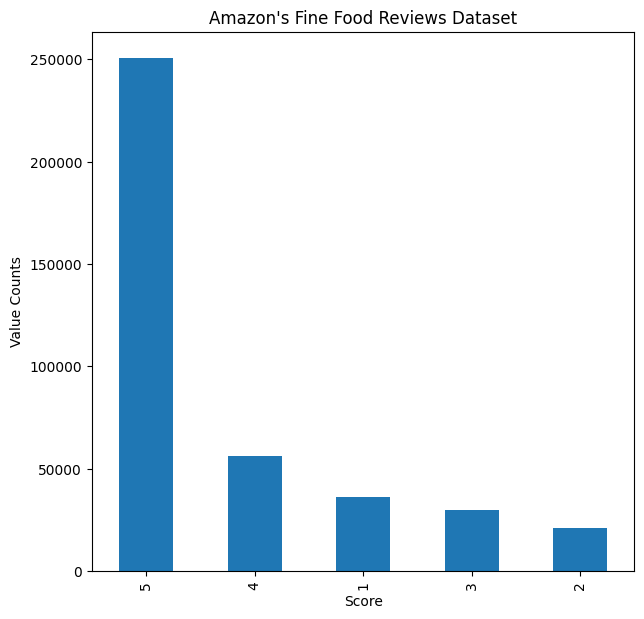

In [7]:
ax:object = df['Score'].value_counts().plot(kind='bar', figsize=(7,7))
fig:object = ax.get_figure()
ax.set_title("Amazon's Fine Food Reviews Dataset")
ax.set_xlabel('Score')
ax.set_ylabel('Value Counts');

In [8]:
print('A concise summary of the DataFrame is:')
df.info()

A concise summary of the DataFrame is:
<class 'pandas.core.frame.DataFrame'>
Index: 393914 entries, 1 to 568454
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               393914 non-null  object
 1   UserId                  393914 non-null  object
 2   ProfileName             393914 non-null  object
 3   HelpfulnessNumerator    393914 non-null  int64 
 4   HelpfulnessDenominator  393914 non-null  int64 
 5   Score                   393914 non-null  int64 
 6   Time                    393914 non-null  int64 
 7   Summary                 393914 non-null  object
 8   Text                    393914 non-null  object
dtypes: int64(4), object(5)
memory usage: 30.1+ MB


We want to know other information about reviews, such as: <br>
The longest, shortest review <br>
Longest, shortest summary <br>
The person with the most reviews <br>
This data helps us to have a better overview of the data set we are working with

In [9]:
print(f'The longest review written is: {df.Text.map(lambda x: len(x)).max()}')
print(f'The shortest review written is: {df.Text.map(lambda x: len(x)).min()}')
print(f'The longest summary written is: {df.Summary.map(lambda x: len(x)).max()}')
print(f'The shortest summary written is: {df.Summary.map(lambda x: len(x)).min()}')
print(f'The name of the profile with the most reviews is:')
print(df.ProfileName.mode())

The longest review written is: 21409
The shortest review written is: 12
The longest summary written is: 128
The shortest summary written is: 1
The name of the profile with the most reviews is:
0    Gary Peterson
Name: ProfileName, dtype: object


In [10]:
contractions:Dict[str,str] = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [11]:
def clean_text(text:str, remove_stopwords:bool = True) -> str:
    """
    Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings
    param text: the text that is going to be formated
    param remove_stopwords: 
    return:
    """
    
    # Converts words so that they have only small letters
    text = text.lower()
    
    # Replaces contractions with their long form
    if True:
        text = text.split()
        new_text:List[str] = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters such as quotation marks, periods, etc.
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # Remove useless words
    if remove_stopwords:
        text = text.split()
        stops:set = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    # Text tokenization: divide sentences into words
    text =  nltk.WordPunctTokenizer().tokenize(text)
        
    return text

In [12]:
df['Text_Cleaned'] = list(map(clean_text, df.Text))
def lemmatized_words(text):
    lemm:nltk.stem.wordnet.WordNetLemmatizer = nltk.stem.WordNetLemmatizer()
    df['Lemmatized_text'] = list(map(lambda word:list(map(lemm.lemmatize, word)),df.Text_Cleaned))

lemmatized_words(df.Text_Cleaned)

In [13]:
df.head(5)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_Cleaned,Lemmatized_text
Id,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"[bought, several, vitality, canned, dog, food,...","[bought, several, vitality, canned, dog, food,..."
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"[product, arrived, labeled, jumbo, salted, pea...","[product, arrived, labeled, jumbo, salted, pea..."
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy...","[confection, around, century, light, pillowy, ..."
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli...","[looking, secret, ingredient, robitussin, beli..."
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"[great, taffy, great, price, wide, assortment,...","[great, taffy, great, price, wide, assortment,..."


In [14]:
pd.set_option('max_colwidth', 500)
df[['Score', 'Text', 'Text_Cleaned', 'Lemmatized_text']].sample(5)

,Score,Text,Text_Cleaned,Lemmatized_text
Id,,,,
257078,2,"good.<br />The bar-b-que style was on sale recently and we tried those, they seemed spicy for chips but quickly became addictive.<br /><br />These are greasy, salty and odd tasting.<br />Read the ingredients before buying.","[good, <, br, >, the, bar, b, que, style, sale, recently, tried, seemed, spicy, chips, quickly, became, addictive, <, br, ><, br, >, these, greasy, salty, odd, tasting, <, br, >, read, ingredients, buying]","[good, <, br, >, the, bar, b, que, style, sale, recently, tried, seemed, spicy, chip, quickly, became, addictive, <, br, ><, br, >, these, greasy, salty, odd, tasting, <, br, >, read, ingredient, buying]"
478903,5,"I love the Plochman's Chili Dog mustard on hot dogs and corn dogs, so I thought I'd give this one a try when I needed to stock up on mustard recently. This is good stuff -- has a good flavor reminiscent of ballpark dogs and comes in a handy squeeze bottle. Amazon's price seems to fluctuate on this one quite a bit, so pick it up when the price is low and you won't be disappointed.","[love, plochman, chili, dog, mustard, hot, dogs, corn, dogs, thought, would, give, one, try, needed, stock, mustard, recently, good, stuff, good, flavor, reminiscent, ballpark, dogs, comes, handy, squeeze, bottle, amazon, price, seems, fluctuate, one, quite, bit, pick, price, low, disappointed]","[love, plochman, chili, dog, mustard, hot, dog, corn, dog, thought, would, give, one, try, needed, stock, mustard, recently, good, stuff, good, flavor, reminiscent, ballpark, dog, come, handy, squeeze, bottle, amazon, price, seems, fluctuate, one, quite, bit, pick, price, low, disappointed]"
363536,5,"We love this stuff. We don't just use this in our chili though. We use the spices the salt and all of the ceyene no masa. We always use two boxes for 3 pounds ground beef and 1 pound pinto beans. But we add our own stuff. We add one can of el pato (mexican tomato sauce)in replace of one of the cans of regular tomato sauce chipotle paste with adobo, 1/2 of a teaspoon crushed red pepper flakes and 2 table spoon dehydrated minced onion because I don't like the texture of real onions. We like it...","[love, stuff, use, chili, though, use, spices, salt, ceyene, masa, always, use, two, boxes, 3, pounds, ground, beef, 1, pound, pinto, beans, add, stuff, add, one, el, pato, mexican, tomato, sauce, replace, one, cans, regular, tomato, sauce, chipotle, paste, adobo, 1, 2, teaspoon, crushed, red, pepper, flakes, 2, table, spoon, dehydrated, minced, onion, like, texture, real, onions, like, real, spicy, comment, one, others, said, taste, like, real, chili, completely, wrong, eat, canned, chili, ...","[love, stuff, use, chili, though, use, spice, salt, ceyene, masa, always, use, two, box, 3, pound, ground, beef, 1, pound, pinto, bean, add, stuff, add, one, el, pato, mexican, tomato, sauce, replace, one, can, regular, tomato, sauce, chipotle, paste, adobo, 1, 2, teaspoon, crushed, red, pepper, flake, 2, table, spoon, dehydrated, minced, onion, like, texture, real, onion, like, real, spicy, comment, one, others, said, taste, like, real, chili, completely, wrong, eat, canned, chili, probably..."
241747,5,"I switched my 4 month old son over to this brand from Enfamil because he was getting very constipated on that one. After switching to Earth's best, that is no longer an issue for him. He liked the taste right away! This product is a bit more expensive, but if you use subscribe and save, it basically costs the same as the other name brand formulas.","[switched, 4, month, old, son, brand, enfamil, getting, constipated, one, switching, earth, best, longer, issue, liked, taste, right, away, product, bit, expensive, use, subscribe, save, basically, costs, name, brand, formulas]","[switched, 4, month, old, son, brand, enfamil, getting, constipated, one, switching, earth, best, longer, issue, liked, taste, right, away, product, bit, expensive, use, subscribe, save, basically, cost, name, b

In [15]:
bow_converter:sklearn.feature_extraction.text.CountVectorizer = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=(1,1), lowercase=False)
x:scipy.sparse.csr.csr_matrix = bow_converter.fit_transform(df['Text_Cleaned'])

words:List[str] = bow_converter.get_feature_names_out()
print(f'The cleaned text has: {len(words)} words')

The cleaned text has: 110421 words


In [16]:
bow:sklearn.feature_extraction.text.CountVectorizer = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=(1,1), lowercase=False)
X1:scipy.sparse.csr.csr_matrix = bow.fit_transform(df['Text_Cleaned'])
y1:np.ndarray = df['Score']
    
X1 = X1[:1000]
y1 = y1[:1000]

In [17]:
linear_reg:sklearn.linear_model._base.LinearRegression = LinearRegression()
ridge:sklearn.linear_model._ridge.Ridge = Ridge(alpha=1.0)
lasso:sklearn.linear_model._coordinate_descent.Lasso = Lasso(alpha=1.0)
elastic_net:sklearn.linear_model._coordinate_descent.ElasticNet = ElasticNet(random_state=0)

linear_reg.fit(X1, y1)
ridge.fit(X1, y1)
lasso.fit(X1, y1)
elastic_net.fit(X1, y1)

ElasticNet(random_state=0)

In [18]:
def lin_reg_params() -> Dict[str, List[bool]]:
    """
    Creates a dictionary with the names of the parameters as keys, and as values,
    lists with the possible values; for Linear Regression
    return: the dictionary 
    """
    copy_X:List[bool] = [True, False]
    fit_intercept:List[bool] = [True, False]
    
    return dict(copy_X=copy_X, fit_intercept=fit_intercept)

def lasso_ridge_elastic_params() -> Dict[str, List[Union[float, bool]]]:
    """
    Creates a dictionary with the names of the parameters as keys, and as values,
    lists with the possible values; for Lasso, Ridge and Elastic Net
    return: the dictionary
    """
    alpha:List[float] = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
    fit_intercept:List[bool] = [True, False]
    
    return dict(alpha=alpha, fit_intercept=fit_intercept)

def randomized_search(model:sklearn.linear_model, param_distributions:Dict[str, List[Union[float, bool]]], data:np.ndarray, target:np.ndarray) -> float:
    """
    Calculates the optimal hyperparameters values for a chosen regression model, for a given data set
    param model: the regression model
    param param_distributions: dictionary with the names of the parameters as the value of the keys and a set of values
    param date: the date of the data set
    param target: the target of the data set
    """
    randomized_src:sklearn.model_selection.RandomizedSearchCV = RandomizedSearchCV(estimator = model, param_distributions=param_distributions, n_iter = 5, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    randomized_src.fit(data, target)
    
    return randomized_src

def randomize_calculate(model:sklearn.linear_model, params:Dict[str,List[Union[float,bool]]], data:np.ndarray, target:np.ndarray, score_type:str, error_type:str) -> float:
    """
    Reports the mean results for one of the fold links (train / test) with RandomizedSearchCV
    param model: the regression model
    param param_grid: dictionary with the name of the parameters as the value of the keys and a set of values
    param date: the data of the data set
    param target: the target of the data set
    param score_type: the type of score
    param error_type: the type of error
    """
    rand_src:sklearn.model_selection.RandomizedSearchCV = randomized_search(model, params, data, target)
    result:List[float] = cross_validate(rand_src, data, target, cv=5, return_train_score=True, scoring=error_type)
    
    return result[score_type].mean()

def get_errors_score(score_type: str, error_type: str, data:np.ndarray, target:np.ndarray) -> List[float]:
    """
    Builds a list from the mean results for the training folds, as well as for the test folds,
    for a given dataset
    param score_type: the type of score
    param error_type: type of error
    param date: the date of the dataset
    param target: the target of the dataset
    return: list of averages
    """
    column:List[float] = []
    column.append(randomize_calculate(linear_reg, lin_reg_params(), data, target, score_type, error_type))
    column.append(randomize_calculate(ridge, lasso_ridge_elastic_params(), data, target, score_type, error_type))  
    column.append(randomize_calculate(lasso, lasso_ridge_elastic_params(), data, target, score_type, error_type))   
    column.append(randomize_calculate(elastic_net, lasso_ridge_elastic_params(), data, target, score_type, error_type)) 
    
    return column

def get_data_frame(data:np.ndarray, target:np.ndarray) -> Dict[str, List[Union[str,float]]]:  
    """
    Builds a dictionary from the columns of the result averages for the training folds,
    as well as for the test ones, for a given dataset
    param date: the data of the dataset
    param target: the target of the dataset
    return: the dictionary
    """
    test_neg_mean_absolute_error:List[float] = get_errors_score('test_score', 'neg_mean_absolute_error', data, target)    
    test_neg_mean_squared_error:List[float] = get_errors_score('test_score', 'neg_mean_squared_error', data, target)
    test_r2_error:List[float] = get_errors_score('test_score', 'r2', data, target)
    train_neg_mean_absolute_error:List[float] = get_errors_score('train_score', 'neg_mean_absolute_error', data, target)
    train_neg_mean_squared_error:List[float] = get_errors_score('train_score', 'neg_mean_squared_error', data, target)
    train_r2_error:List[float] = get_errors_score('train_score', 'r2', data, target)

    data_frame:Dict[str,List[Union[str,float]]] = {
            'Model_name': ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net'],
            'Search_strategy': ['RandomizedSearchCV', 'RandomizedSearchCV', 'RandomizedSearchCV','RandomizedSearchCV'],
            'test_neg_mean_absolute_error': test_neg_mean_absolute_error,
            'test_neg_mean_squared_error': test_neg_mean_squared_error,
            'test_r2_error': test_r2_error,
            'train_neg_mean_absolute_error': train_neg_mean_absolute_error,
            'train_neg_mean_squared_error': train_neg_mean_squared_error,
            'train_r2_error': train_r2_error,
        }
    
    return data_frame

def get_positive_data_frame(data_frame: Dict[str, List[Union[str, float]]]) -> Dict[str, List[Union[str, float]]]:
    """
    Builds a dictionary with positive values from the columns made up from the result averages
    for training folds, as well as for the test ones, for a given dataset
    param date: the data of the dataset
    param target: the target of the dataset
    return: the dictionary
    """
    pos_data_frame:Dict[str,List[Union[str,float]]] = {}
    lst:List[Union[str,float]] = []
    
    for key in data_frame:
        for value in data_frame[key]:
            if isinstance(value, float):
                lst.append(abs(value))
            else:
                lst.append(value)
        pos_data_frame[key.replace("_neg","")] = lst
        lst = []
        
    return pos_data_frame

In [19]:
data_frame:Dict[str, List[Union[str, float]]] = get_data_frame(X1, y1)
new_data_frame:pandas.core.frame.DataFrame = pd.DataFrame(data_frame)
display(new_data_frame)

,Model_name,Search_strategy,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2_error,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_r2_error
0,Linear Regression,RandomizedSearchCV,-1.345798,-3.650620,-1.135278,-0.000144,-4.612608e-08,1.000000
1,Ridge,RandomizedSearchCV,-1.083492,-2.121352,-0.220577,-0.101891,-2.512462e-02,0.985305
2,Lasso,RandomizedSearchCV,-1.055418,-1.761159,-0.010801,-1.053401,-1.753556e+00,0.000000
3,Elastic Net,RandomizedSearchCV,-1.055418,-1.761159,-0.010801,-1.053401,-1.753556e+00,0.000000


In [20]:
positive_data_frame:Dict[str, List[Union[str, float]]] = get_positive_data_frame(data_frame)
pos_df:pandas.core.frame.DataFrame = pd.DataFrame(positive_data_frame)
display(pos_df)

,Model_name,Search_strategy,test_mean_absolute_error,test_mean_squared_error,test_r2_error,train_mean_absolute_error,train_mean_squared_error,train_r2_error
0,Linear Regression,RandomizedSearchCV,1.345798,3.650620,1.135278,0.000144,4.612608e-08,1.000000
1,Ridge,RandomizedSearchCV,1.083492,2.121352,0.220577,0.101891,2.512462e-02,0.985305
2,Lasso,RandomizedSearchCV,1.055418,1.761159,0.010801,1.053401,1.753556e+00,0.000000
3,Elastic Net,RandomizedSearchCV,1.055418,1.761159,0.010801,1.053401,1.753556e+00,0.000000


In [21]:
style:pandas.io.formats.style.Styler = pos_df.style.\
    highlight_max(color = 'green', axis = 0).\
    highlight_min(color = 'red', axis = 0)

style

,Model_name,Search_strategy,test_mean_absolute_error,test_mean_squared_error,test_r2_error,train_mean_absolute_error,train_mean_squared_error,train_r2_error
0,Linear Regression,RandomizedSearchCV,1.345798,3.650620,1.135278,0.000144,0.000000,1.000000
1,Ridge,RandomizedSearchCV,1.083492,2.121352,0.220577,0.101891,0.025125,0.985305
2,Lasso,RandomizedSearchCV,1.055418,1.761159,0.010801,1.053401,1.753556,0.000000
3,Elastic Net,RandomizedSearchCV,1.055418,1.761159,0.010801,1.053401,1.753556,0.000000


In [22]:
df2:object = pd.read_csv('./data/Corona_NLP.csv', index_col=0)
df2= df2.dropna()
print(f'The dataframe shape is: {df2.shape}')
df2.head(5)

The dataframe shape is: (2964, 5)


,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
UserName,,,,,
1,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative
2,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu,Negative
5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral
6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a gallon for regular gas in Los Angeles?Prices at the pump are going down. A look at how the #coronavirus is impacting prices. 4pm @ABC7 https://t.co/Pyzq8YMuV5,Neutral


In [23]:
df2.drop_duplicates(subset={'ScreenName', 'OriginalTweet'}, inplace=True)
print(f'The dataframe shape after removing the duplicate rows is: {df2.shape}')

The dataframe shape after removing the duplicate rows is: (2964, 5)


Graph showing which tweets given by customers are the majority. <br>
The predominance of those with a negative score (>800) is observed. <br>
We can divide the tweets into categories according to their score as follows: <br>
Sentiment: Extremely Positive, Positive -> good tweet <br>
Sentiment: Neutral -> neutral tweet <br>
Sentiment: Extremely Negative, Negative -> negative tweet <br>
Some equality is observed, negative (approx. 1250), positive (approx. 1200)

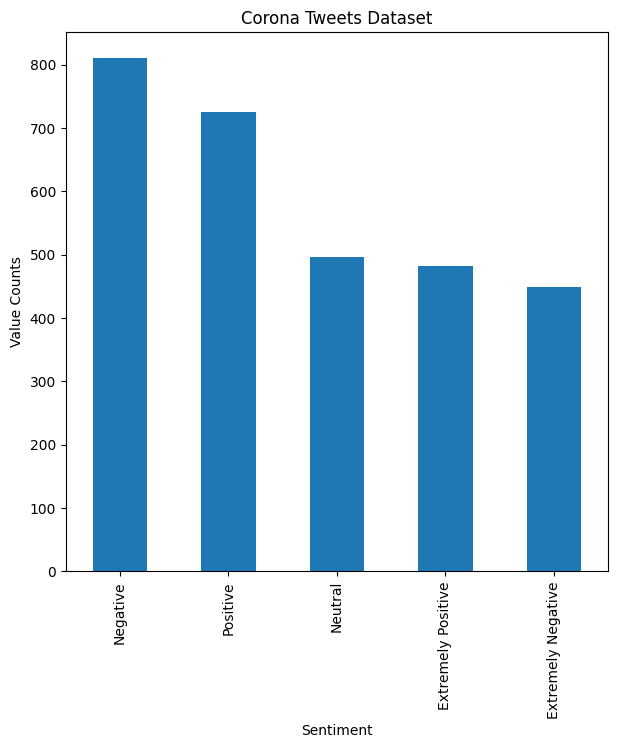

In [24]:
ax2:object = df2['Sentiment'].value_counts().plot(kind='bar', figsize=(7,7))
fig2:object = ax2.get_figure()
ax2.set_title("Corona Tweets Dataset")
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Value Counts');

In [25]:
print('A concise summary of the DataFrame is:')
df2.info()

A concise summary of the DataFrame is:
<class 'pandas.core.frame.DataFrame'>
Index: 2964 entries, 1 to 3798
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ScreenName     2964 non-null   int64 
 1   Location       2964 non-null   object
 2   TweetAt        2964 non-null   object
 3   OriginalTweet  2964 non-null   object
 4   Sentiment      2964 non-null   object
dtypes: int64(1), object(4)
memory usage: 138.9+ KB


We want to know other information about tweets, such as: <br>
Longest, shortest tweet <br>
This data helps us to have a better overview of the data set we are working with

In [26]:
print(f'The longest tweet written is: {df2.OriginalTweet.map(lambda x: len(x)).max()}')
print(f'The shortest tweet written is: {df2.OriginalTweet.map(lambda x: len(x)).min()}')

The longest tweet written is: 342
The shortest tweet written is: 34


Graphic that groups tweets according to the date they were written. <br>
It can be seen that most tweets were written on 13.03.2020. <br>
Most likely, a certain event happened on that day, hence the difference with the other dates.

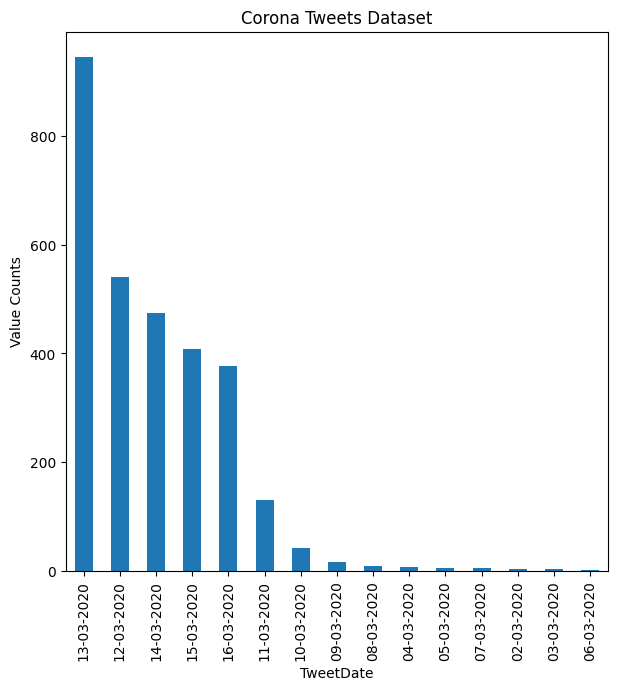

In [27]:
ax2:object = df2['TweetAt'].value_counts().plot(kind='bar', figsize=(7,7))
fig2:object = ax2.get_figure()
ax2.set_title("Corona Tweets Dataset")
ax2.set_xlabel('TweetDate')
ax2.set_ylabel('Value Counts');

In [28]:
df2['Text_Cleaned'] = list(map(clean_text, df2.OriginalTweet))
def lemmatized_words(text): 
    lemm:nltk.stem.wordnet.WordNetLemmatizer = nltk.stem.WordNetLemmatizer()
    df2['Lemmatized_text'] = list(map(lambda word:list(map(lemm.lemmatize, word)),df2.Text_Cleaned))

lemmatized_words(df2.Text_Cleaned)

In [29]:
df2.head(5)

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text_Cleaned,Lemmatized_text
UserName,,,,,,,
1,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative,"[trending, new, yorkers, encounter, empty, supermarket, shelves, pictured, wegmans, brooklyn, sold, online, grocers, foodkick, maxdelivery, coronavirus, fearing, shoppers, stock]","[trending, new, yorkers, encounter, empty, supermarket, shelf, pictured, wegmans, brooklyn, sold, online, grocer, foodkick, maxdelivery, coronavirus, fearing, shopper, stock]"
2,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,"[could, find, hand, sanitizer, fred, meyer, turned, amazon, 114, 97, 2, pack, purell, check, coronavirus, concerns, driving, prices]","[could, find, hand, sanitizer, fred, meyer, turned, amazon, 114, 97, 2, pack, purell, check, coronavirus, concern, driving, price]"
4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu,Negative,"[panic, buying, hits, newyork, city, anxious, shoppers, stock, foodmedical, supplies, healthcare, worker, 30s, becomes, bigapple, 1st, confirmed, coronavirus, patient, bloomberg, staged, event]","[panic, buying, hit, newyork, city, anxious, shopper, stock, foodmedical, supply, healthcare, worker, 30, becomes, bigapple, 1st, confirmed, coronavirus, patient, bloomberg, staged, event]"
5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral,"[toiletpaper, dunnypaper, coronavirus, coronavirusaustralia, coronavirusupdate, covid, 19, 9news, corvid19, 7newsmelb, dunnypapergate, costco, one, week, everyone, buying, baby, milk, powder, next, everyone, buying, toilet, paper]","[toiletpaper, dunnypaper, coronavirus, coronavirusaustralia, coronavirusupdate, covid, 19, 9news, corvid19, 7newsmelb, dunnypapergate, costco, one, week, everyone, buying, baby, milk, powder, next, everyone, buying, toilet, paper]"
6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a gallon for regular gas in Los Angeles?Prices at the pump are going down. A look at how the #coronavirus is impacting prices. 4pm @ABC7 https://t.co/Pyzq8YMuV5,Neutral,"[remember, last, time, paid, 2, 99, gallon, regular, gas, los, angeles, prices, pump, going, look, coronavirus, impacting, prices, 4pm, abc7]","[remember, last, time, paid, 2, 99, gallon, regular, gas, los, angeles, price, pump, going, look, coronavirus, impacting, price, 4pm, abc7]"


In [30]:
def label_race (row:List[Union[str, int]]) -> int:
    """
    Function that converts reviews from string to integer
    param row: the row with the review written as string
    return: the score as an integer
    """
    if row['Sentiment'] == 'Extremely Negative':
        return 1
        
    if row['Sentiment'] == 'Negative':
        return 2
        
    if row['Sentiment'] == 'Neutral':
        return 3
        
    if row['Sentiment'] == 'Positive':
        return 4
        
    if row['Sentiment'] == 'Extremely Positive':
        return 5

In [31]:
df2['Score'] = df2.apply(lambda row: label_race(row),axis=1)
df2.head(5)

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Text_Cleaned,Lemmatized_text,Score
UserName,,,,,,,,
1,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative,"[trending, new, yorkers, encounter, empty, supermarket, shelves, pictured, wegmans, brooklyn, sold, online, grocers, foodkick, maxdelivery, coronavirus, fearing, shoppers, stock]","[trending, new, yorkers, encounter, empty, supermarket, shelf, pictured, wegmans, brooklyn, sold, online, grocer, foodkick, maxdelivery, coronavirus, fearing, shopper, stock]",1
2,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,"[could, find, hand, sanitizer, fred, meyer, turned, amazon, 114, 97, 2, pack, purell, check, coronavirus, concerns, driving, prices]","[could, find, hand, sanitizer, fred, meyer, turned, amazon, 114, 97, 2, pack, purell, check, coronavirus, concern, driving, price]",4
4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu,Negative,"[panic, buying, hits, newyork, city, anxious, shoppers, stock, foodmedical, supplies, healthcare, worker, 30s, becomes, bigapple, 1st, confirmed, coronavirus, patient, bloomberg, staged, event]","[panic, buying, hit, newyork, city, anxious, shopper, stock, foodmedical, supply, healthcare, worker, 30, becomes, bigapple, 1st, confirmed, coronavirus, patient, bloomberg, staged, event]",2
5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral,"[toiletpaper, dunnypaper, coronavirus, coronavirusaustralia, coronavirusupdate, covid, 19, 9news, corvid19, 7newsmelb, dunnypapergate, costco, one, week, everyone, buying, baby, milk, powder, next, everyone, buying, toilet, paper]","[toiletpaper, dunnypaper, coronavirus, coronavirusaustralia, coronavirusupdate, covid, 19, 9news, corvid19, 7newsmelb, dunnypapergate, costco, one, week, everyone, buying, baby, milk, powder, next, everyone, buying, toilet, paper]",3
6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a gallon for regular gas in Los Angeles?Prices at the pump are going down. A look at how the #coronavirus is impacting prices. 4pm @ABC7 https://t.co/Pyzq8YMuV5,Neutral,"[remember, last, time, paid, 2, 99, gallon, regular, gas, los, angeles, prices, pump, going, look, coronavirus, impacting, prices, 4pm, abc7]","[remember, last, time, paid, 2, 99, gallon, regular, gas, los, angeles, price, pump, going, look, coronavirus, impacting, price, 4pm, abc7]",3


In [32]:
bow_converter2:sklearn.feature_extraction.text.CountVectorizer = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=(1, 1), lowercase=False)
x2:scipy.sparse.csr.csr_matrix = bow_converter2.fit_transform(df2['Text_Cleaned'])

words2:List[str] = bow_converter2.get_feature_names_out()
print(f'The cleaned text has: {len(words)} words')

The cleaned text has: 110421 words


In [33]:
bow2:sklearn.feature_extraction.text.CountVectorizer = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=(1, 1), lowercase=False)
X2:scipy.sparse.csr.csr_matrix = bow2.fit_transform(df2['Text_Cleaned'])
y2:np.ndarray = df2['Score']

In [34]:
linear_reg.fit(X2, y2)
ridge.fit(X2, y2)
lasso.fit(X2, y2)
elastic_net.fit(X2, y2)

ElasticNet(random_state=0)

In [35]:
data_frame2:Dict[str,List[Union[str, float]]] = get_data_frame(X2, y2)
new_data_frame2:pandas.core.frame.DataFrame = pd.DataFrame(data_frame2)
display(new_data_frame2)

,Model_name,Search_strategy,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2_error,train_neg_mean_absolute_error,train_neg_mean_squared_error,train_r2_error
0,Linear Regression,RandomizedSearchCV,-0.906028,-1.368187,0.227533,-0.002985,-0.004585,0.997416
1,Ridge,RandomizedSearchCV,-0.815029,-1.068833,0.397121,-0.145271,-0.039447,0.976572
2,Lasso,RandomizedSearchCV,-1.394359,-1.776239,-0.002504,-1.148144,-1.774405,0.000000
3,Elastic Net,RandomizedSearchCV,-1.148845,-1.776239,-0.002504,-1.332159,-1.774405,0.000000


In [36]:
positive_data_frame2:Dict[str,List[Union[str,float]]] = get_positive_data_frame(data_frame2)
pos_df2:pandas.core.frame.DataFrame = pd.DataFrame(positive_data_frame2)
display(pos_df2)

,Model_name,Search_strategy,test_mean_absolute_error,test_mean_squared_error,test_r2_error,train_mean_absolute_error,train_mean_squared_error,train_r2_error
0,Linear Regression,RandomizedSearchCV,0.906028,1.368187,0.227533,0.002985,0.004585,0.997416
1,Ridge,RandomizedSearchCV,0.815029,1.068833,0.397121,0.145271,0.039447,0.976572
2,Lasso,RandomizedSearchCV,1.394359,1.776239,0.002504,1.148144,1.774405,0.000000
3,Elastic Net,RandomizedSearchCV,1.148845,1.776239,0.002504,1.332159,1.774405,0.000000


In [37]:
style2:pandas.io.formats.style.Styler = pos_df.style.\
    highlight_max(color = 'green', axis = 0).\
    highlight_min(color = 'red', axis = 0)

style2

,Model_name,Search_strategy,test_mean_absolute_error,test_mean_squared_error,test_r2_error,train_mean_absolute_error,train_mean_squared_error,train_r2_error
0,Linear Regression,RandomizedSearchCV,1.345798,3.650620,1.135278,0.000144,0.000000,1.000000
1,Ridge,RandomizedSearchCV,1.083492,2.121352,0.220577,0.101891,0.025125,0.985305
2,Lasso,RandomizedSearchCV,1.055418,1.761159,0.010801,1.053401,1.753556,0.000000
3,Elastic Net,RandomizedSearchCV,1.055418,1.761159,0.010801,1.053401,1.753556,0.000000


## Text preprocessing
To preprocess text simply means to bring it into a form that is predictable and analyzable for a given task. A task here is a combination of approach and domain. For example, extracting top keywords with TF-IDF (approach) from Tweets (domain) is an example task.

### Lower case:
Lowercasing all text data is one of the simplest and most efficient forms of preprocessing. It is applicable to most extraction problems, and NLP can help in cases where your dataset is not very large. It significantly helps the consistency of the expected result.

### Contractions:
Contractions are words or word combinations that are shortened by subtracting letters and replacing them with an apostrophe.

Nowadays, where everything is changing online, we communicate more with others through text messages or posts on various social networks like Facebook, Instagram, Whatsapp, Twitter, LinkedIn etc. in the form of texts. With so many people to talk to, we rely on abbreviations and short forms of words to send text messages.
We have replaced contractions with their longer forms, such as "isn't": "is not", "can't": "cannot". To do this, I imported the list of contractions from [here](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python)

### Remove special characters:
Often unstructured text contains a lot of noise, especially if you use techniques like screen scraping.
We've cleaned the data of any special characters, such as quotation marks, punctuation, and possessive pronouns.

### Stopwords: 
Stop words are a set of words commonly used in a language. Examples of stop words in English are "a", "the", "is", "are" and etc. .

For example, in the context of a search system, if your search query is "what is preprocessing text?", you want the search system to focus on the surface of documents that talk about preprocessing text over documents that talk about what is. This can be done by preventing the parsing of all the words in your stop word list. Stop words are commonly applied in search systems, text classification applications, topic modeling, topic extraction, and more.
We removed stop words because they add noise without adding any informational value to the modeling. I downloaded a list of English keywords from the nltk package and deleted them from the text corpus.

### Tokenization:
To process text, we need to split it into smaller chunks. Here we split sentences into words using WordPunctTokenizer from the nltk library.

### Lemmatization:
Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form. The only difference is that lemmatization attempts to do it properly. It doesn't just chop things up, it actually turns the words into the actual root. For example, the word "better" would be paired with "good". Maybe use a dictionary like WordNet for mappings or some special rule-based approach. 
To convert each word to its root word, I used Lemmatizer from WordNet.

## Regression models used

1. [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
2. [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
3. [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
4. [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

### Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

In linear regression, relationships are modelled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models. Most commonly, the conditional mean of the response given by the values of the explanatory variables (or predictors) is assumed to be an affine function of these values; more rarely, the conditional median or some other quantile is used. Like all forms of regression analysis, linear regression focuses on the conditional probability distribution of the response given by the predictor values, rather than on the joint probability distribution of all these variables, which is the domain of multivariate analysis.

Linear regression was the first type of regression analysis to be rigorously studied and widely used in practical applications. This is because models that depend linearly on their unknown parameters are easier to fit than models that are nonlinearly related to their parameters, and because the statistical properties of the resulting estimators are easier to determine.

Linear regression has many practical uses. Most applications fall into one of two broad categories:

If the objective is prediction, forecasting, or error reduction, linear regression can be used to fit a predictive model to an observed data set of response values and explanatory variables. After developing such a model, if additional values of the explanatory variables are collected without an accompanying response value, the fitted model can be used to make a prediction of the response.

If the goal is to explain the variation in the response variable that can be attributed to variation in the explanatory variables, linear regression analysis can be applied to quantify the strength of the relationship between the response and the explanatory variables and, in particular, to determine whether some explanatory variables may have no linear relationship with the response at all or to identify which subsets of explanatory variables may contain redundant information about the response.

Linear regression models are often fitted using the least-squares approach, but they can also be fitted in other ways, such as by minimizing "lack of fit" in other rules (such as least absolute deviation regression) or by minimizing a least-squares cost function version penalty as in ridge (L2-norm penalty) and lasso (L1-norm penalty) regression. Conversely, the least-squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely related, they are not synonymous.

**Bibliography:** <br>
    https://en.wikipedia.org/wiki/Linear_regression <br>
    https://machinelearningmastery.com/linear-regression-for-machine-learning/
    
 ![LinearRegression](./images/LinearRegression.png)

### Ridge

Ridge regression is a method for estimating the coefficients of multiple regression models in scenarios where the independent variables are highly correlated. It has uses in fields including econometrics, chemistry and engineering.


The theory was first introduced by Hoerl and Kennard in 1970 in their technometric papers "RIDGE regressions: biased estimation of nonorthogonal problems" and "RIDGE regressions: applications in nonorthogonal problems". This was the result of ten years of research in ridge analysis.


Ridge regression was developed as a possible solution to the imprecision of least-squares estimators when linear regression models have some multicollinear (highly correlated) independent variables - by creating a ridge regression (RR) estimator. It provides a more accurate estimate of ridge parameters, since the variance and mean squared estimator are often smaller than previously derived least-squares estimators.


For any type of regression machine learning models, the usual regression equation forms the basis which is written as:


Y = XB + e


Where Y is the dependent variable, X represents the independent variables, B is the regression coefficients to be evaluated and e represents the errors are residuals.


Once we add the lambda function to this equation, the variance that is not evaluated by the general model is taken into account. Once the data are ready and identified to be part of the L2 regularization, there are steps you can take.


In ridge regression, the first step is to standardize the variables (both dependent and independent) by subtracting their means and dividing by the standard deviations. This causes a challenge in notation, as we must somehow indicate whether the variables in a given formula are standardized or not. In terms of standardization, all ridge regression calculations are based on standardized variables. When the final regression coefficients are displayed, they are adjusted back to their original scale. However, the ridge traces are on a standardized scale.


**Bibliography:** <br>
    https://en.wikipedia.org/wiki/Ridge_regression <br>
    https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db
    


### Lasso

In statistics and machine learning, Lasso (least shrinkage operator and absolute selection; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization to increase the prediction accuracy and interpretability of the resulting statistical model. It was originally introduced in geophysics, and later by Robert Tibshirani, who coined the term.

Lasso was originally formulated for linear regression models. This simple case reveals a substantial amount about the estimator. These include its relation to ridge regression and best subset selection and the connections between the lasso coefficient estimates and the so-called soft threshold. They also show that (like standard linear regression) coefficient estimates need not be unique if the covariates are collinear.

Although originally defined for linear regression, Lasso regularization is easily extended to other statistical models, including generalized linear models, generalized estimating equations, proportional hazards models, and M estimators. Lasso's ability to perform subset selection is based on the shape of the constraint and has a variety of interpretations, including geometry, Bayesian statistics, and convex analysis.

LASSO is closely related to basic tracking denoising.

Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of the coefficients. This type of regularization can lead to sparse models with few coefficients; some coefficients may become zero and removed from the model. Higher penalties result in coefficient values closer to zero, which is ideal for producing simpler models. On the other hand, L2 regularization (e.g. Ridge regression) does not result in the elimination of coefficients or sparse models. This makes Lasso much easier to interpret than Ridge. Lasso solutions are quadratic programming problems that are best solved with software.

One problem with linear regression is that the estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable. This is especially true for problems with few observations (samples) or more samples (n) than input predictors (p) or variables (so-called p >> n problems).

One approach to address the stability of regression models is to change the loss function to include extra costs for a model that has large coefficients. Linear regression models that use these modified loss functions during training are collectively referred to as penalized linear regression.

A popular penalty is to penalize a model based on the sum of the absolute coefficient values. This is called the L1 penalty. An L1 penalty minimizes the size of all coefficients and allows some coefficients to be reduced to zero, which removes the predictor from the model.

l1_penalty = sum j = 0 to p abs (beta_j)
An L1-penalty minimizes the size of all coefficients and allows any coefficient to go to zero, effectively removing the input features from the model.

Prior to Lasso, the most widely used method for choosing covariates was stepwise selection. This approach improves prediction accuracy only in certain cases, such as when only a few covariates have a strong relationship with the outcome. However, in other cases, it may increase the prediction error.

**Bibliography:** <br>
https://en.wikipedia.org/wiki/Lasso_(statistics) <br>
https://www.statisticshowto.com/lasso-regression/

![Lasso](./images/Lasso.jpg)

### Elastic Net

Elastic Net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty function.

Linear regression refers to a model that assumes a linear relationship between the input variables and the target variable.

With a single input variable, this relationship is a line, and with larger dimensions, this relationship can be thought of as a hyperplane connecting the input variables to the target variable. The model coefficients are found through an optimization process that seeks to minimize the sum of the squared error between the predictions (yhat) and the expected target values (y).

loss = sum i = 0 to n (y_i - yhat_i) ^ 2 <br>
A problem with linear regression is that the estimated model coefficients can become large, making the model sensitive to inputs and possibly unstable. This is especially true for problems with few observations (samples) or more samples (n) than input predictors (p) or variables (so-called p >> n problems).

One approach to addressing the stability of regression models is to change the loss function to include additional costs for a model that has large coefficients. Linear regression models that use these modified loss functions during training are collectively called penalized linear regression.

A popular penalty is to penalize a model based on the sum of squared coefficient values. This is called the L2 penalty. An L2 penalty minimizes the size of all coefficients, although it prevents any coefficients from being dropped from the model.

l2_penalty = sum j = 0 to p beta_j ^ 2 <br>
Another popular penalty is to penalize a model based on the sum of absolute coefficient values. This is called the L1 penalty. An L1 penalty minimizes the size of all coefficients and allows some coefficients to be reduced to zero, which removes the predictor from the model.

l1_penalty = sum j = 0 to p abs (beta_j) <br>
Elastic Net is a penalized linear regression model that includes both L1 and L2 penalties during training.

Using the terminology from "Elements of Statistical Learning", a hyperparameter "alpha" is provided to assign how much weight is given to each of the L1 and L2 penalties. Alpha is a value between 0 and 1 and is used to weight the contribution of the L1 penalty and a minus alpha value is used to weight the L2 penalty.

elastic_net_penalty = (alpha * l1_penalty) + ((1 - alpha) * l2_penalty) <br>
For example, an alpha of 0.5 would give a 50% contribution of each penalty to the loss function. An alpha value of 0 gives all the weight of the L2 penalty and a value of 1 gives all the weight of the L1 penalty.

The alpha parameter determines the penalty mix and is often preselected for qualitative reasons.

The advantage is that the elastic network allows for a balance of both penalties, which can lead to better performance than a model with one or the other penalty on certain problems.

Another hyperparameter called "lambda" is provided which controls the weighting of the sum of both penalties to the loss function. A default value of 1.0 is used to use the fully weighted penalty; a value of 0 excludes the penalty. Very small values of lambda, such as 1e-3 or less, are common.

elastic_net_loss = loss + (lambda * elastic_net_penalty)

**Bibliography:** <br>
https://en.wikipedia.org/wiki/Elastic_net_regularization <br>
https://machinelearningmastery.com/elastic-net-regression-in-python/

![Elastic Net](./images/ElasticNet.jpg)